Saving fifa_eda.csv to fifa_eda.csv


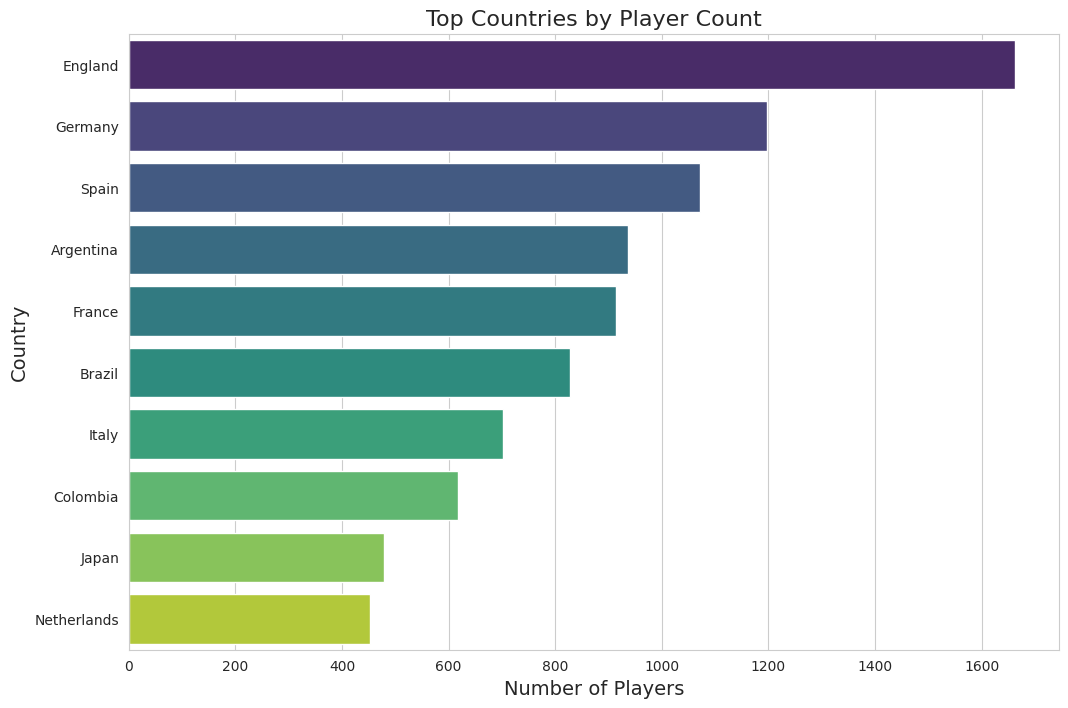

In [1]:
# Load the necessary libraries
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load D3.js library
display(HTML("""
<script src="https://d3js.org/d3.v5.min.js"></script>
"""))

# Upload the dataset to your Colab environment
from google.colab import files
uploaded = files.upload()

# Read the dataset
fifa_data = pd.read_csv('fifa_eda.csv')

# Extract top countries by player count
top_countries = fifa_data['Nationality'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']

# Plotting the top countries by player count using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Country', data=top_countries, palette="viridis")
plt.title('Top Countries by Player Count', fontsize=16)
plt.xlabel('Number of Players', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()


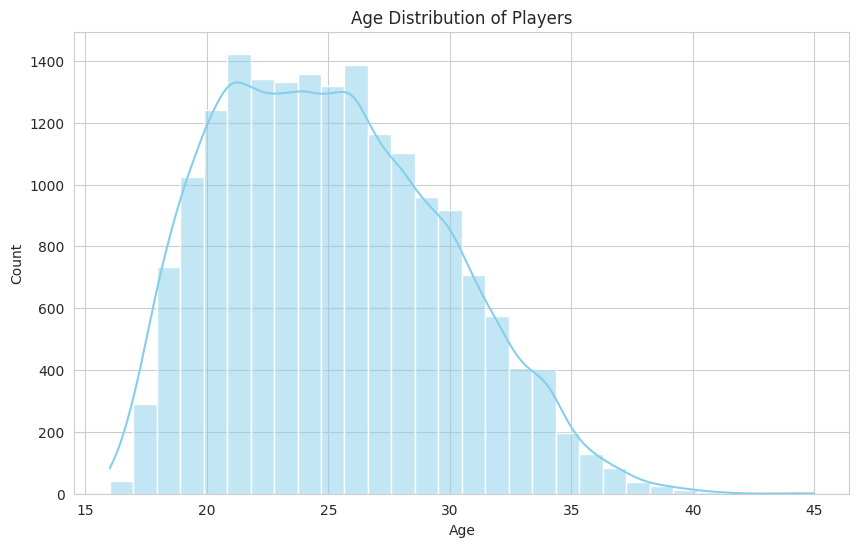

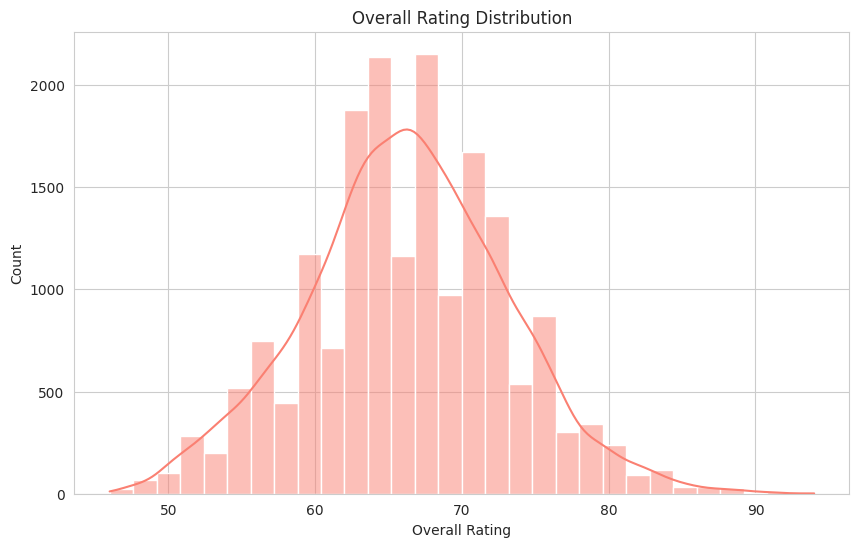

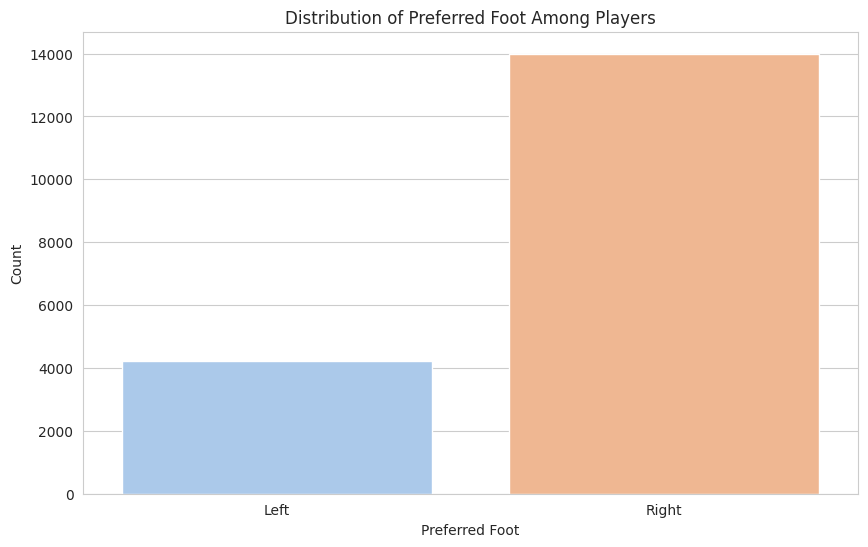

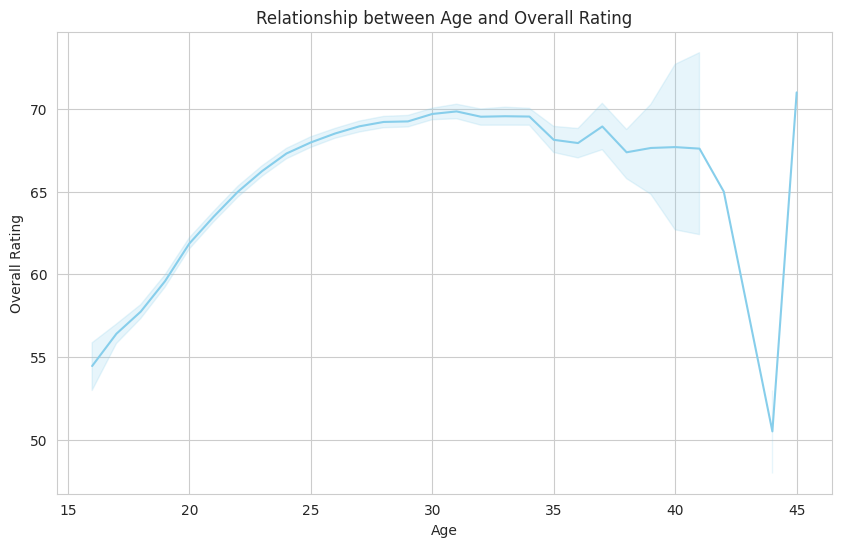

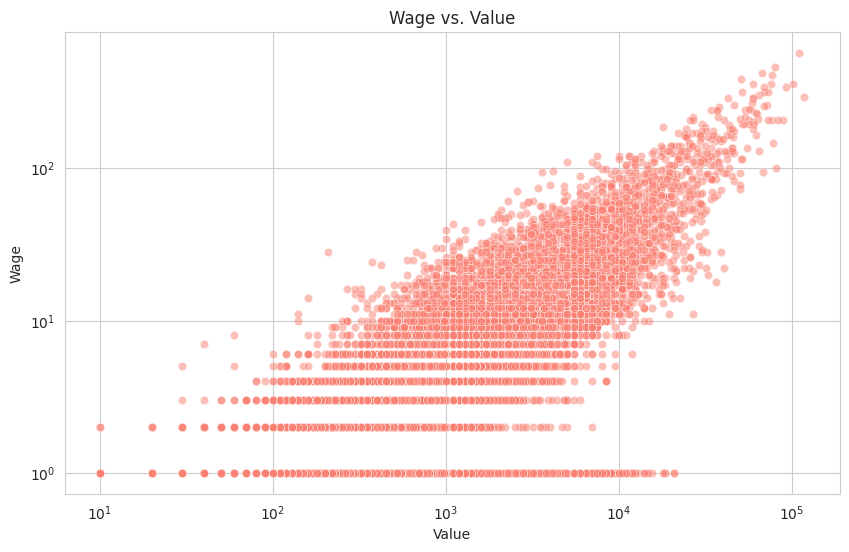

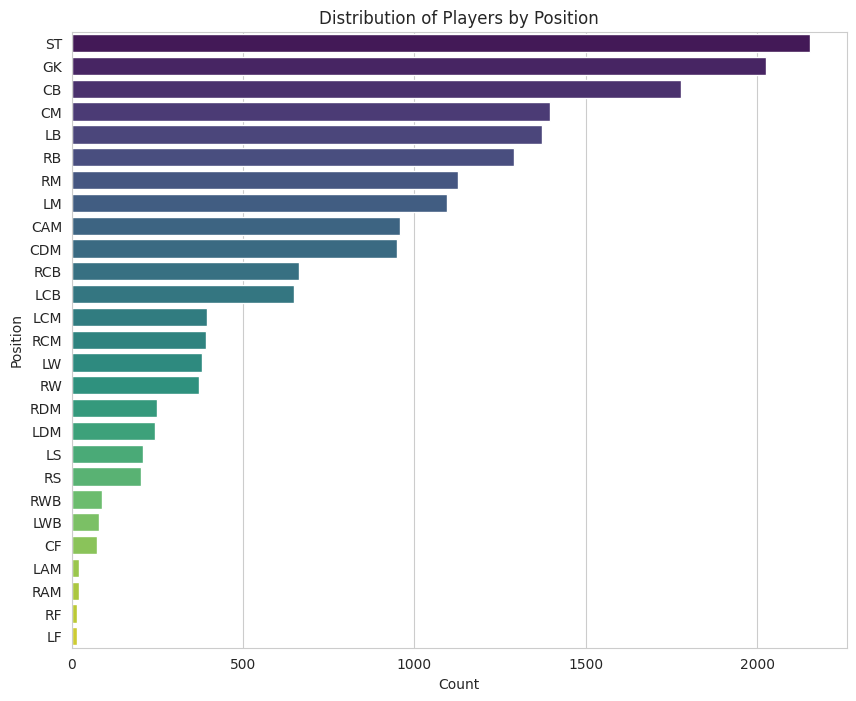

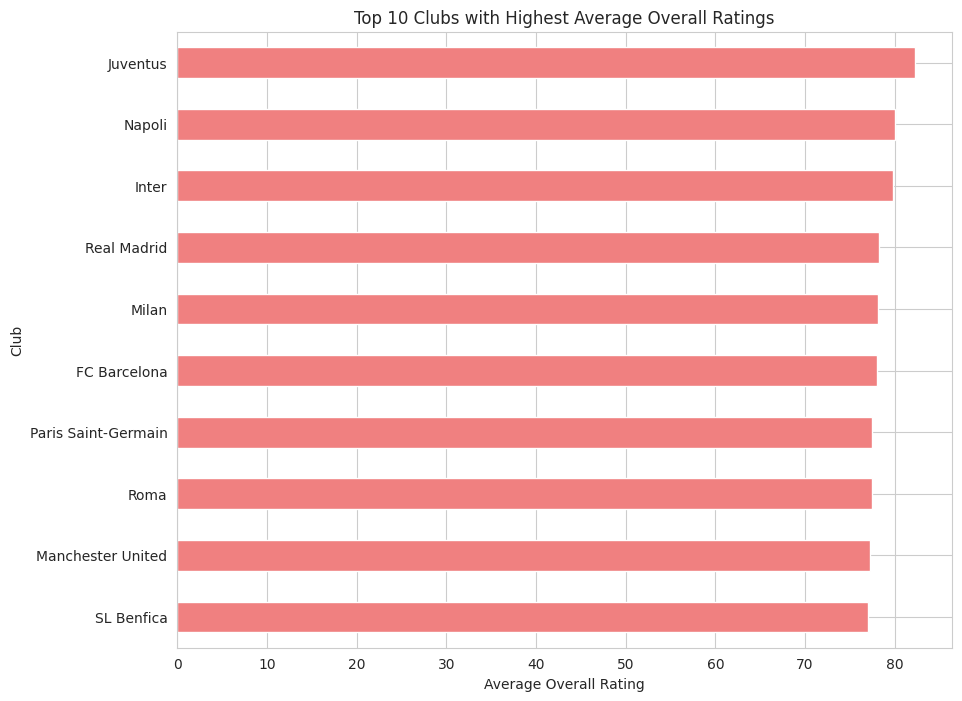

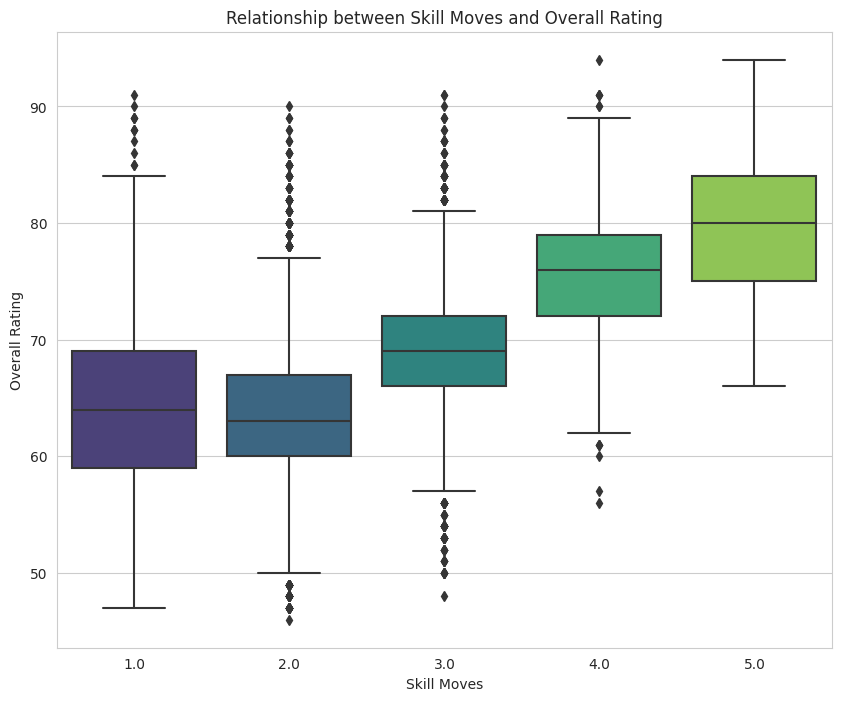

In [3]:
# End-to-end EDA for FIFA dataset in Google Colab

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming the file is uploaded to your Colab workspace)
fifa_data = pd.read_csv('fifa_eda.csv')

# Data Cleaning

# Fill missing values
fifa_data['Club'].fillna('Unknown', inplace=True)
for col in ['Value', 'International Reputation', 'Skill Moves']:
    median_value = fifa_data[col].median()
    fifa_data[col].fillna(median_value, inplace=True)
mode_value = fifa_data['Contract Valid Until'].mode()[0]
fifa_data['Contract Valid Until'].fillna(mode_value, inplace=True)
fifa_data['Contract Valid Until'] = pd.to_datetime(fifa_data['Contract Valid Until'])

# Visualizations

# Set style for seaborn plots
sns.set_style("whitegrid")

# Age distribution of players
plt.figure(figsize=(10, 6))
sns.histplot(fifa_data['Age'], bins=30, kde=True, color="skyblue")
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Overall rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(fifa_data['Overall'], bins=30, kde=True, color="salmon")
plt.title('Overall Rating Distribution')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

# Distribution of preferred foot among players
plt.figure(figsize=(10, 6))
sns.countplot(data=fifa_data, x='Preferred Foot', palette="pastel")
plt.title('Distribution of Preferred Foot Among Players')
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.show()

# Relationship between Age and Overall Rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=fifa_data, x='Age', y='Overall', color="skyblue")
plt.title('Relationship between Age and Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

# Wage vs. Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fifa_data, x='Value', y='Wage', color="salmon", alpha=0.5)
plt.title('Wage vs. Value')
plt.xlabel('Value')
plt.ylabel('Wage')
plt.yscale('log')
plt.xscale('log')
plt.show()

# Distribution of Players by Position
plt.figure(figsize=(10, 8))
sns.countplot(data=fifa_data, y='Position', palette="viridis", order=fifa_data['Position'].value_counts().index)
plt.title('Distribution of Players by Position')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

# Top 10 Clubs with Highest Average Overall Ratings
plt.figure(figsize=(10, 8))
top_clubs = fifa_data.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
top_clubs.sort_values().plot(kind='barh', color="lightcoral")
plt.title('Top 10 Clubs with Highest Average Overall Ratings')
plt.xlabel('Average Overall Rating')
plt.ylabel('Club')
plt.show()

# Relationship between Skill Moves and Overall Rating
plt.figure(figsize=(10, 8))
sns.boxplot(data=fifa_data, x='Skill Moves', y='Overall', palette="viridis")
plt.title('Relationship between Skill Moves and Overall Rating')
plt.xlabel('Skill Moves')
plt.ylabel('Overall Rating')
plt.show()



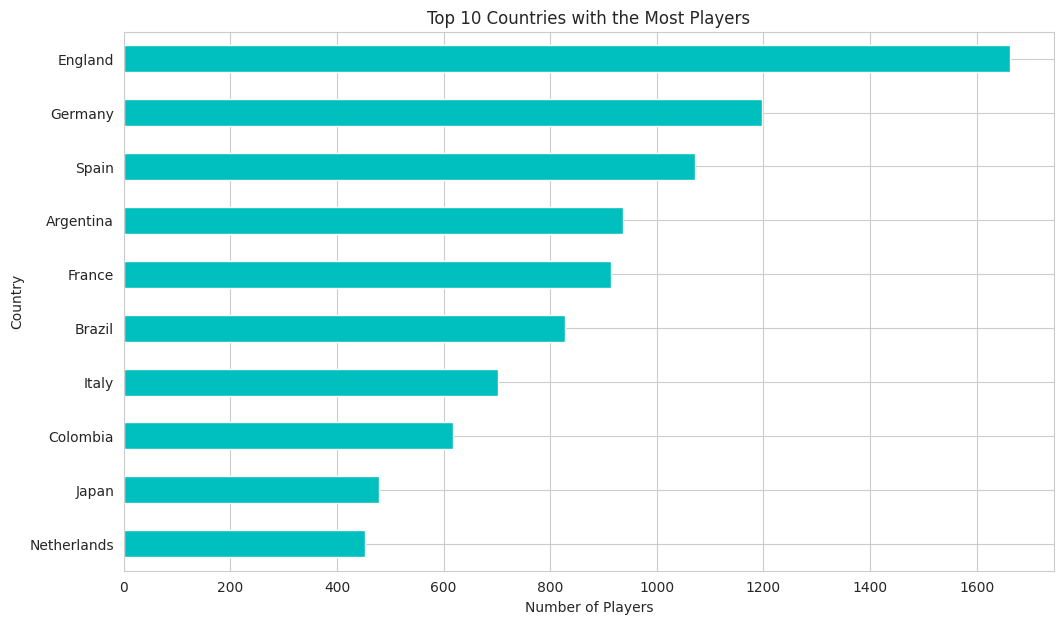

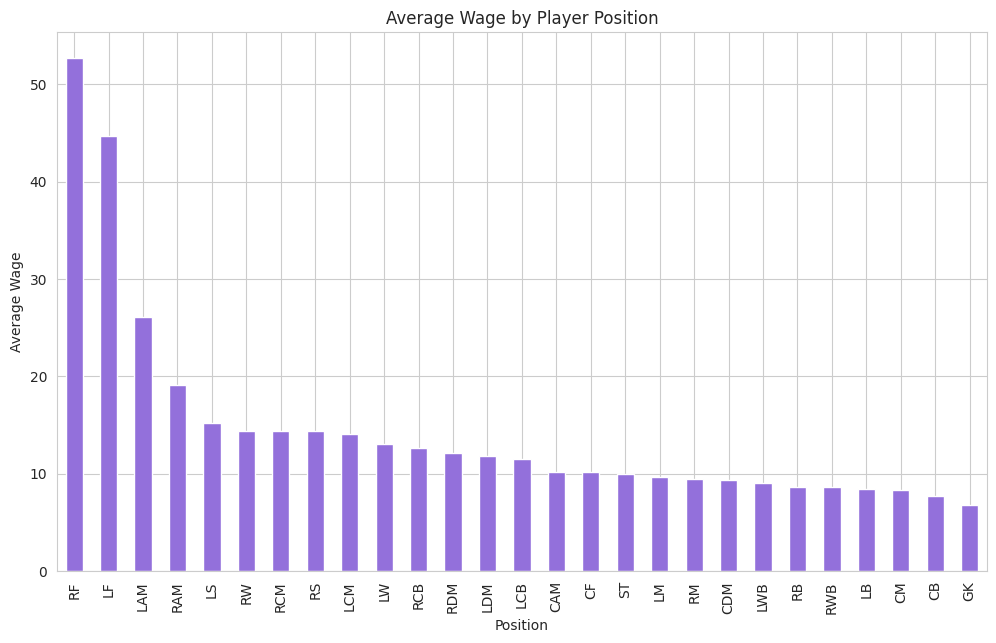

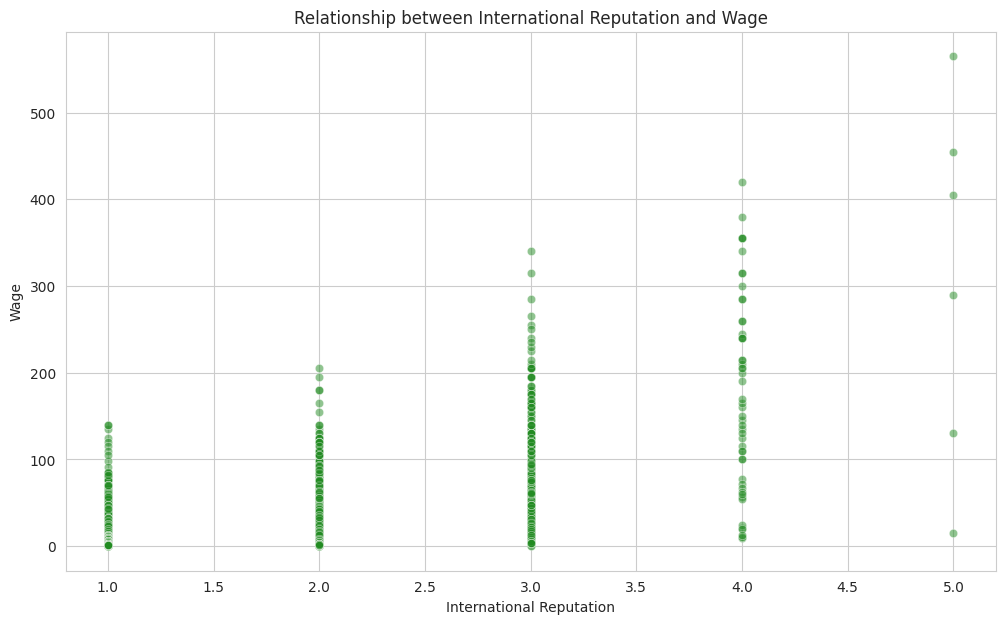

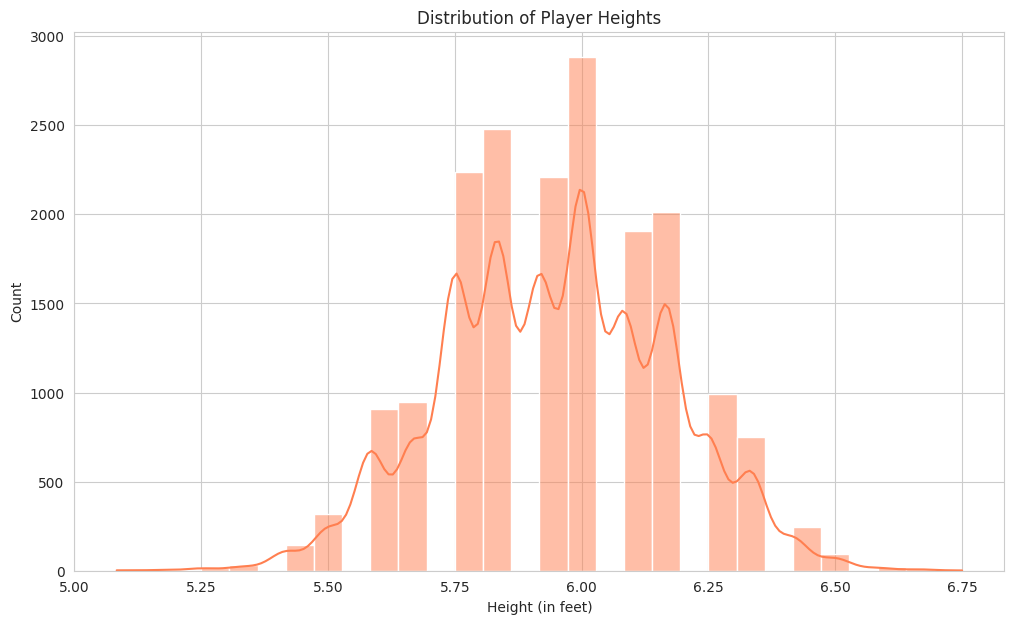

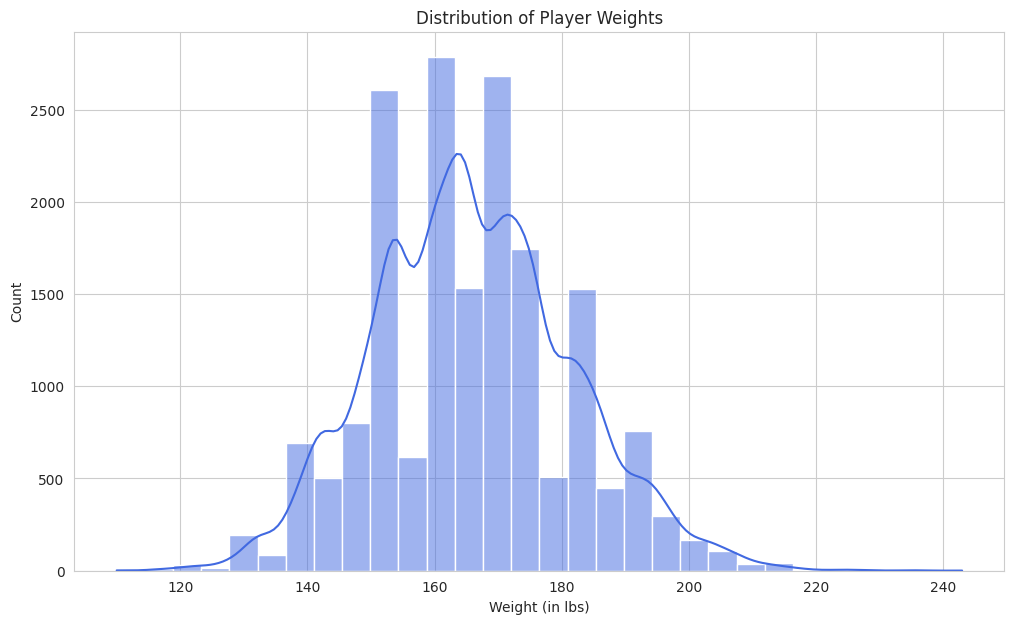

In [4]:
# Additional EDA for FIFA dataset in Google Colab

# Top 10 Countries with the Most Players
plt.figure(figsize=(12, 7))
top_countries = fifa_data['Nationality'].value_counts().head(10)
top_countries.sort_values().plot(kind='barh', color="c")
plt.title('Top 10 Countries with the Most Players')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()

# Average Wage by Player Position
plt.figure(figsize=(12, 7))
avg_wage_by_position = fifa_data.groupby('Position')['Wage'].mean().sort_values(ascending=False)
avg_wage_by_position.plot(kind='bar', color="mediumpurple")
plt.title('Average Wage by Player Position')
plt.xlabel('Position')
plt.ylabel('Average Wage')
plt.show()

# Relationship between International Reputation and Wage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=fifa_data, x='International Reputation', y='Wage', color="forestgreen", alpha=0.5)
plt.title('Relationship between International Reputation and Wage')
plt.xlabel('International Reputation')
plt.ylabel('Wage')
plt.show()

# Distribution of Player Heights
plt.figure(figsize=(12, 7))
sns.histplot(fifa_data['Height'], bins=30, kde=True, color="coral")
plt.title('Distribution of Player Heights')
plt.xlabel('Height (in feet)')
plt.ylabel('Count')
plt.show()

# Distribution of Player Weights
plt.figure(figsize=(12, 7))
sns.histplot(fifa_data['Weight'], bins=30, kde=True, color="royalblue")
plt.title('Distribution of Player Weights')
plt.xlabel('Weight (in lbs)')
plt.ylabel('Count')
plt.show()


# **Top 10 Countries with the Most Players**

In [8]:
from IPython.core.display import display, HTML

# Prepare data
top_countries = fifa_data['Nationality'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']

# Convert DataFrame to JSON
data_json = top_countries.to_json(orient='records')

# HTML and JS template for the bar chart using D3.js
template = f"""
<div id="d3-container"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {data_json};

// Set the dimensions of the canvas / graph
var margin = {{top: 20, right: 20, bottom: 70, left: 40}},
    width = 600 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;

// Set the ranges
var x = d3.scaleBand().range([0, width]).padding(0.1);
var y = d3.scaleLinear().range([height, 0]);

// Create the SVG element
var svg = d3.select("#d3-container").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Scale the range of the data in the domains
x.domain(data.map(function(d) {{ return d.Country; }}));
y.domain([0, d3.max(data, function(d) {{ return d.Count; }})]);

// Create bars
svg.selectAll(".bar")
    .data(data)
  .enter().append("rect")
    .attr("class", "bar")
    .attr("x", function(d) {{ return x(d.Country); }})
    .attr("width", x.bandwidth())
    .attr("y", function(d) {{ return y(d.Count); }})
    .attr("height", function(d) {{ return height - y(d.Count); }});

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the visualization
display(HTML(template))


# Distribution of Player Heights

In [12]:
# Prepare data for "Distribution of Player Heights"
height_data = fifa_data['Height'].dropna().tolist()

# HTML and JS template for the histogram using D3.js
template_histogram = f"""
<div id="d3-container-histogram"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {height_data};

// Set the dimensions of the canvas / graph
var margin = {{top: 20, right: 20, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Create the SVG element
var svg = d3.select("#d3-container-histogram").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Create histogram data
var histogram = d3.histogram()
    .value(function(d) {{ return d; }})
    .domain([5, 7]) // Height range
    .thresholds(20);

var bins = histogram(data);

// Set the ranges
var x = d3.scaleLinear()
    .domain([5, 7])
    .range([0, width]);

var y = d3.scaleLinear()
    .domain([0, d3.max(bins, function(d) {{ return d.length; }})])
    .range([height, 0]);

// Create bars for histogram
svg.selectAll("rect")
    .data(bins)
    .enter()
    .append("rect")
    .attr("x", function(d) {{ return x(d.x0); }})
    .attr("y", function(d) {{ return y(d.length); }})
    .attr("width", function(d) {{ return x(d.x1) - x(d.x0) - 1; }})
    .attr("height", function(d) {{ return height - y(d.length); }})
    .style("fill", "steelblue");

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the visualization for "Distribution of Player Heights"
display(HTML(template_histogram))


# Distribution of Player Weights

In [13]:
# Prepare data for "Distribution of Player Weights"
weight_data = fifa_data['Weight'].dropna().tolist()

# HTML and JS template for the histogram using D3.js
template_histogram_weight = f"""
<div id="d3-container-histogram-weight"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {weight_data};

// Set the dimensions of the canvas / graph
var margin = {{top: 20, right: 20, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Create the SVG element
var svg = d3.select("#d3-container-histogram-weight").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Create histogram data
var histogram = d3.histogram()
    .value(function(d) {{ return d; }})
    .domain([100, 250]) // Weight range
    .thresholds(30);

var bins = histogram(data);

// Set the ranges
var x = d3.scaleLinear()
    .domain([100, 250])
    .range([0, width]);

var y = d3.scaleLinear()
    .domain([0, d3.max(bins, function(d) {{ return d.length; }})])
    .range([height, 0]);

// Create bars for histogram
svg.selectAll("rect")
    .data(bins)
    .enter()
    .append("rect")
    .attr("x", function(d) {{ return x(d.x0); }})
    .attr("y", function(d) {{ return y(d.length); }})
    .attr("width", function(d) {{ return x(d.x1) - x(d.x0) - 1; }})
    .attr("height", function(d) {{ return height - y(d.length); }})
    .style("fill", "teal");

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the visualization for "Distribution of Player Weights"
display(HTML(template_histogram_weight))


# Top 10 Clubs with the Highest Average Overall Ratings

In [14]:
# Prepare data for "Top 10 Clubs with the Highest Average Overall Ratings"
top_clubs = fifa_data.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10).reset_index()
top_clubs.columns = ['Club', 'Average Overall Rating']

# Convert DataFrame to JSON
data_json_top_clubs = top_clubs.to_json(orient='records')

# HTML and JS template for the bar chart using D3.js
template_top_clubs = f"""
<div id="d3-container-top-clubs"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {data_json_top_clubs};

// Set the dimensions of the canvas / graph
var margin = {{top: 20, right: 20, bottom: 150, left: 150}},
    width = 800 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Set the ranges
var x = d3.scaleBand().range([0, width]).padding(0.1);
var y = d3.scaleLinear().range([height, 0]);

// Create the SVG element
var svg = d3.select("#d3-container-top-clubs").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Scale the range of the data in the domains
x.domain(data.map(function(d) {{ return d.Club; }}));
y.domain([0, d3.max(data, function(d) {{ return d['Average Overall Rating']; }})]);

// Create bars
svg.selectAll(".bar")
    .data(data)
  .enter().append("rect")
    .attr("class", "bar")
    .attr("x", function(d) {{ return x(d.Club); }})
    .attr("width", x.bandwidth())
    .attr("y", function(d) {{ return y(d['Average Overall Rating']); }})
    .attr("height", function(d) {{ return height - y(d['Average Overall Rating']); }})
    .style("fill", "gold");

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x))
    .selectAll("text")
    .attr("transform", "rotate(-45)")
    .style("text-anchor", "end");

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the visualization for "Top 10 Clubs with the Highest Average Overall Ratings"
display(HTML(template_top_clubs))


# Relationship between Age and Potential

In [15]:
# Prepare data for "Relationship between Age and Potential"
# Using a sample for better visualization and performance
sample_data_age_potential = fifa_data.sample(1000)[['Age', 'Potential']]

# Convert DataFrame to JSON
data_json_age_potential = sample_data_age_potential.to_json(orient='records')

# HTML and JS template for the scatter plot using D3.js
template_age_potential = f"""
<div id="d3-container-age-potential"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {data_json_age_potential};

// Set the dimensions of the canvas / graph
var margin = {{top: 20, right: 20, bottom: 60, left: 60}},
    width = 800 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Set the ranges
var x = d3.scaleLinear().range([0, width]);
var y = d3.scaleLinear().range([height, 0]);

// Create the SVG element
var svg = d3.select("#d3-container-age-potential").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Scale the range of the data in the domains
x.domain([15, 45]); // Age range
y.domain([40, 100]); // Potential range

// Create dots for scatter plot
svg.selectAll("dot")
    .data(data)
  .enter().append("circle")
    .attr("r", 5)
    .attr("cx", function(d) {{ return x(d.Age); }})
    .attr("cy", function(d) {{ return y(d.Potential); }})
    .style("fill", "limegreen");

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the visualization for "Relationship between Age and Potential"
display(HTML(template_age_potential))


# Distribution of Skill Moves among Players

In [16]:
# Prepare data for "Distribution of Skill Moves among Players"
skill_moves_data = fifa_data['Skill Moves'].value_counts().reset_index()
skill_moves_data.columns = ['Skill Moves', 'Count']

# Convert DataFrame to JSON
data_json_skill_moves = skill_moves_data.to_json(orient='records')

# HTML and JS template for the pie chart using D3.js
template_skill_moves = f"""
<div id="d3-container-skill-moves"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {data_json_skill_moves};

// Set the dimensions of the canvas / graph
var width = 800;
var height = 500;
var radius = Math.min(width, height) / 2;

// Create the SVG element
var svg = d3.select("#d3-container-skill-moves").append("svg")
    .attr("width", width)
    .attr("height", height)
  .append("g")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

// Define the color scale
var color = d3.scaleOrdinal(d3.schemeCategory10);

// Create the pie chart
var pie = d3.pie()
    .value(function(d) {{ return d.Count; }})
    .sort(null);

var path = d3.arc()
    .innerRadius(0)
    .outerRadius(radius);

var label = d3.arc()
    .outerRadius(radius)
    .innerRadius(radius - 80);

var arc = svg.selectAll(".arc")
    .data(pie(data))
  .enter().append("g")
    .attr("class", "arc");

arc.append("path")
    .attr("d", path)
    .attr("fill", function(d) {{ return color(d.data['Skill Moves']); }});

arc.append("text")
    .attr("transform", function(d) {{ return "translate(" + label.centroid(d) + ")"; }})
    .attr("dy", "0.35em")
    .text(function(d) {{ return d.data['Skill Moves']; }});

</script>
"""

# Display the visualization for "Distribution of Skill Moves among Players"
display(HTML(template_skill_moves))


# Top 10 Players by Value

In [17]:
# Prepare data for "Top 10 Players by Value"
top_players_value = fifa_data[['Name', 'Value']].sort_values(by='Value', ascending=False).head(10)

# Convert DataFrame to JSON
data_json_top_players_value = top_players_value.to_json(orient='records')

# HTML and JS template for the bar chart using D3.js
template_top_players_value = f"""
<div id="d3-container-top-players-value"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {data_json_top_players_value};

// Set the dimensions of the canvas / graph
var margin = {{top: 20, right: 20, bottom: 150, left: 150}},
    width = 800 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Set the ranges
var x = d3.scaleBand().range([0, width]).padding(0.1);
var y = d3.scaleLinear().range([height, 0]);

// Create the SVG element
var svg = d3.select("#d3-container-top-players-value").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Scale the range of the data in the domains
x.domain(data.map(function(d) {{ return d.Name; }}));
y.domain([0, d3.max(data, function(d) {{ return d.Value; }})]);

// Create bars
svg.selectAll(".bar")
    .data(data)
  .enter().append("rect")
    .attr("class", "bar")
    .attr("x", function(d) {{ return x(d.Name); }})
    .attr("width", x.bandwidth())
    .attr("y", function(d) {{ return y(d.Value); }})
    .attr("height", function(d) {{ return height - y(d.Value); }})
    .style("fill", "darkorange");

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x))
    .selectAll("text")
    .attr("transform", "rotate(-45)")
    .style("text-anchor", "end");

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the visualization for "Top 10 Players by Value"
display(HTML(template_top_players_value))


# Distribution of Preferred Foot among Players

In [18]:
# Prepare data for "Distribution of Preferred Foot among Players"
preferred_foot_data = fifa_data['Preferred Foot'].value_counts().reset_index()
preferred_foot_data.columns = ['Preferred Foot', 'Count']

# Convert DataFrame to JSON
data_json_preferred_foot = preferred_foot_data.to_json(orient='records')

# HTML and JS template for the donut chart using D3.js
template_preferred_foot = f"""
<div id="d3-container-preferred-foot"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {data_json_preferred_foot};

// Set the dimensions of the canvas / graph
var width = 800;
var height = 500;
var radius = Math.min(width, height) / 2;

// Create the SVG element
var svg = d3.select("#d3-container-preferred-foot").append("svg")
    .attr("width", width)
    .attr("height", height)
  .append("g")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

// Define the color scale
var color = d3.scaleOrdinal(d3.schemeCategory10);

// Create the pie chart
var pie = d3.pie()
    .value(function(d) {{ return d.Count; }})
    .sort(null);

var path = d3.arc()
    .innerRadius(radius - 100)
    .outerRadius(radius);

var label = d3.arc()
    .outerRadius(radius)
    .innerRadius(radius - 80);

var arc = svg.selectAll(".arc")
    .data(pie(data))
  .enter().append("g")
    .attr("class", "arc");

arc.append("path")
    .attr("d", path)
    .attr("fill", function(d) {{ return color(d.data['Preferred Foot']); }});

arc.append("text")
    .attr("transform", function(d) {{ return "translate(" + label.centroid(d) + ")"; }})
    .attr("dy", "0.35em")
    .text(function(d) {{ return d.data['Preferred Foot']; }});

</script>
"""

# Display the visualization for "Distribution of Preferred Foot among Players"
display(HTML(template_preferred_foot))


# Top 10 Players with the Highest Release Clauses

In [19]:
# Prepare data for "Top 10 Players with the Highest Release Clauses"
top_release_clauses = fifa_data[['Name', 'Release Clause']].sort_values(by='Release Clause', ascending=False).head(10)

# Convert DataFrame to JSON
data_json_release_clauses = top_release_clauses.to_json(orient='records')

# HTML and JS template for the bar chart using D3.js
template_release_clauses = f"""
<div id="d3-container-release-clauses"></div>

<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

var data = {data_json_release_clauses};

// Set the dimensions of the canvas / graph
var margin = {{top: 20, right: 20, bottom: 150, left: 150}},
    width = 800 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

// Set the ranges
var x = d3.scaleBand().range([0, width]).padding(0.1);
var y = d3.scaleLinear().range([height, 0]);

// Create the SVG element
var svg = d3.select("#d3-container-release-clauses").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Scale the range of the data in the domains
x.domain(data.map(function(d) {{ return d.Name; }}));
y.domain([0, d3.max(data, function(d) {{ return d['Release Clause']; }})]);

// Create bars
svg.selectAll(".bar")
    .data(data)
  .enter().append("rect")
    .attr("class", "bar")
    .attr("x", function(d) {{ return x(d.Name); }})
    .attr("width", x.bandwidth())
    .attr("y", function(d) {{ return y(d['Release Clause']); }})
    .attr("height", function(d) {{ return height - y(d['Release Clause']); }})
    .style("fill", "purple");

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x))
    .selectAll("text")
    .attr("transform", "rotate(-45)")
    .style("text-anchor", "end");

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

</script>
"""

# Display the visualization for "Top 10 Players with the Highest Release Clauses"
display(HTML(template_release_clauses))
